In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
MDS = pd.read_csv('/Users/manavsharma/Code/PYTHON/dataanalysis/csv_files/US_Accidents_March23.csv')

In [4]:
MDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
MDS.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [53]:
tempdf = pd.DataFrame(MDS['Severity'].groupby(MDS['City']).value_counts())

tempdf=tempdf.reset_index()
tempdf.loc[(tempdf['count']>200) & (tempdf['Severity']>2)] 

critical = tempdf.loc[(tempdf['count']>200) & (tempdf['Severity']>2)] 
critical

,City,Severity,count
26,Abingdon,3,281
74,Acworth,3,278
111,Addison,3,355
172,Aiken,3,275
197,Akron,3,1732
...,...,...,...
34153,York,3,840
34154,York,4,266
34200,Ypsilanti,3,306
34223,Yulee,3,211


In [68]:
critical[['Severity','count']].sort_values(by='count')

,Severity,count
32240,4,201
19556,4,202
14172,4,202
1657,3,202
17023,3,202
...,...,...
5300,3,17872
14021,3,29411
1129,3,31020
7150,3,33024


In [70]:
critical['count'].describe()

count     1074.000000
mean      1105.874302
std       2558.885712
min        201.000000
25%        291.000000
50%        446.000000
75%        878.000000
max      34927.000000
Name: count, dtype: float64

In [73]:
MDS.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

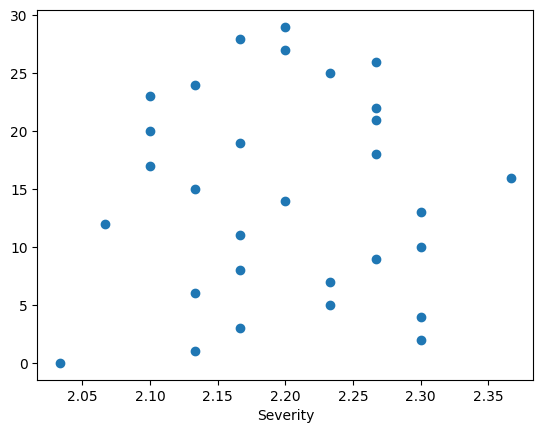

In [83]:
plt.xlabel("Severity")
l1 = []
for i in range(30):
    l1.append(MDS.sample(30)['Severity'].mean())

plt.scatter(l1,range(30))

In [84]:
l1=pd.DataFrame(l1)
l1.mean()

0    2.198889
dtype: float64

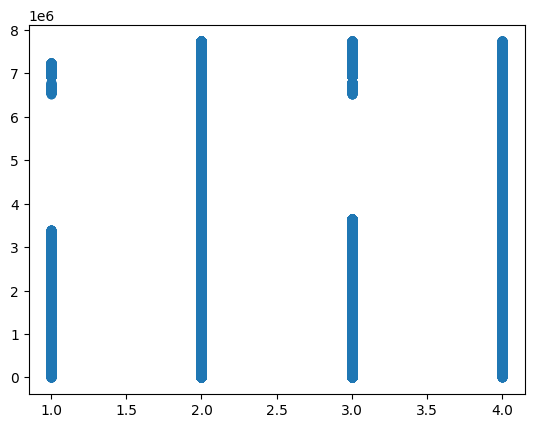